In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
data = pd.read_csv('q1_data.csv', header=0)
data

,productivity,experience,day
0,53,A,M
1,58,A,Tu
2,49,A,W
3,52,A,Thur
4,60,A,F
5,55,B,M
6,57,B,Tu
7,53,B,W
8,57,B,Thur
9,64,B,F


![image.png](boxplot.PNG)

*made with R

## One-way ANOVA with Blocking

$$ H_{0}: \mu_{A} = \mu_{B} = \mu_{C} $$
$$ H_{a}: not H_{0} $$

In [24]:
formula = 'productivity ~ experience + day'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=1)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
display(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
experience,2.00000,147.73333,73.86667,24.35165,0.00040
day,4.00000,231.73333,57.93333,19.09890,0.00037
Residual,8.00000,24.26667,3.03333,nan,nan


The null hypothesis that the mean productivity of each experience level is equal should be rejected. That is, at least one experience level (A, B, or C) has significantly different productivity than the others. See below for a post hoc analysis.

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print((pairwise_tukeyhsd(data['productivity'], data['experience'])))
print('\n')
print((pairwise_tukeyhsd(data['productivity'], data['day'])))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  A      B      2.8    -4.9895 10.5895 False 
  A      C      7.6    -0.1895 15.3895 False 
  B      C      4.8    -2.9895 12.5895 False 
---------------------------------------------


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  F      M    -8.3333   -19.48   2.8133 False 
  F     Thur  -6.6667  -17.8133   4.48  False 
  F      Tu   -5.3333   -16.48   5.8133 False 
  F      W     -12.0   -23.1466 -0.8534  True 
  M     Thur   1.6667   -9.48   12.8133 False 
  M      Tu     3.0    -8.1466  14.1466 False 
  M      W    -3.6667  -14.8133   7.48  False 
 Thur    Tu    1.3333  -9.8133   12.48  False 
 Thur    W    -5.3333   -16.48   5.8133 False 
  Tu     W    -6.6667  -17.8133   4.48  False 
----------------------------------------------


The above post-hoc analysis indicates that the mean productivity most significantly differs for the pair A-C. Therefore, this is the difference in means that most significantly contributes to the rejection of the null hypothesis. _Note that the Reject column defaults to a high alpha value and does not reject this pair by default._ Furthermore, the mean productivity differs most significantly for the pair of days Wednesday-Friday. It differs by a relatively large amount for other pairs of days as well. 
<br>
<br>
This affects each group A, B, and C similarly, however, as provided in the problem statement. With this said, it is necessary to conduct the experiment with blocking of the days, because every worker of various experience levels must create data for every day, so that the differences in productivity due to days are accounted for.

#### QQ-plot of residuals

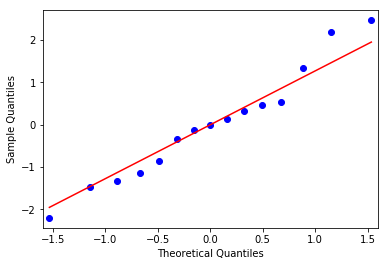

In [26]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

## One-way ANOVA Without Blocking

,df,sum_sq,mean_sq,F,PR(>F)
experience,2.00000,147.73333,73.86667,3.46250,0.06499
Residual,12.00000,256.00000,21.33333,nan,nan


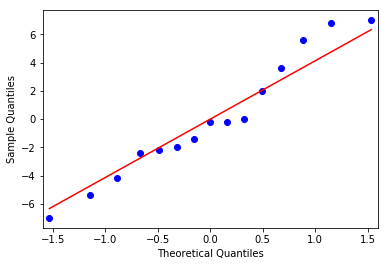

In [27]:
formula = 'productivity ~ experience' #just remove 'day' from the model
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=1)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
display(aov_table)

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

When conducting a one-way ANOVA without blocking of days, the p-value of 0.065 associated with the 'experience' factor indicates that the null hypothesis should __not__ be rejected. That is, the mean productivity of each group is the same (not significantly different). 
<br>
<br>
It can be seen that __blocking did make a difference in the result of the test__ - failing to account for differences in productivity due to days results in a Type II error (failure to reject a false null hypothesis that the mean producitivies are the same across groups). Although this data is just a sample, it is pretty clear from the box-plot that at least one mean is significantly different (group C)